In [44]:
#import all libraries which are required for training a datsaet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn


In [47]:
#convert txt to csv
data_train = pd.read_csv('/home/kumaripinki/DL_assesment4/legal_train.txt', sep=" ", header=None)
data_train.head()

,0,1,2,3
0,-DOCSTART-,-X-,-X-,O
1,1,Others,NaN,NaN
2,The,Others,NaN,NaN
3,applicants,Others,NaN,NaN
4,Sharman,B-Organization,NaN,NaN


In [48]:
data_train.columns

Int64Index([0, 1, 2, 3], dtype='int64')

In [49]:
data_test = pd.read_csv('/home/kumaripinki/DL_assesment4/legal_test.txt', sep=" ", header=None)
data_valid = pd.read_csv('/home/kumaripinki/DL_assesment4/legal_valid.txt', sep=" ", header=None)
print(data_test.shape)
print(data_valid.shape)
print(data_train.shape)

(95, 4)
(776, 4)
(4390, 4)


In [50]:
#EDA on train data
data_train.describe()
#plot the count of each column 0,1,2,3 on x- axis and count on y-axis


,0,1,2,3
count,4390,4390,17,17
unique,1024,26,1,1
top,the,Others,-X-,O
freq,357,3638,17,17


In [62]:
# Replace missing values in col3 and col4 with the mean of those columns

df_data = data_train.copy()

In [67]:
df_data.columns = ['Column1', 'Column2', 'Column3', 'Column4']
df_data.shape

(4390, 4)

In [66]:
df_data.isnull().sum()

Column1       0
Column2       0
Column3    4373
Column4    4373
dtype: int64

In [70]:
df_data.drop(['Column3', 'Column4'], axis=1, inplace=True)

In [71]:
#check which columns in df_data have null values
df_data.isnull().sum()


Column1    0
Column2    0
dtype: int64

In [84]:
df_data.head(10)

,Column1,Column2
0,-DOCSTART-,-X-
1,1,Others
2,The,Others
3,applicants,Others
4,Sharman,B-Organization
5,Networks,I-Organization
6,Ltd,L-Organization
7,Sharman,B-Organization
8,Networks,L-Organization
9,Sharman,B-Organization


<Axes: xlabel='Column1', ylabel='Count'>

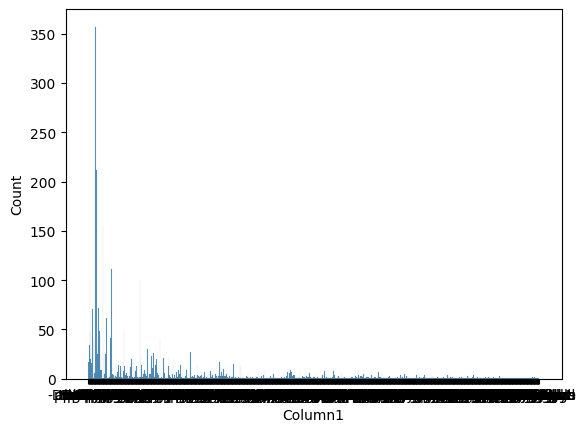

In [82]:
sns.histplot(df_data['Column1'])

<Axes: xlabel='Column2', ylabel='Count'>

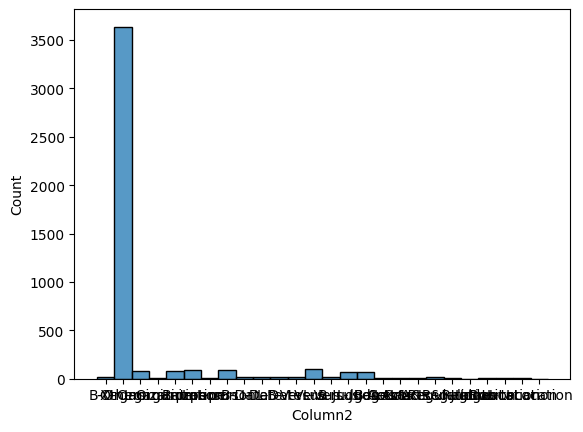

In [83]:
sns.histplot(df_data['Column2'])

/home/kumaripinki/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 94.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/kumaripinki/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 97.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/kumaripinki/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 85.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/kumaripinki/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/kumaripinki/miniconda3/lib/python3.10/

<Axes: xlabel='Column2', ylabel='Column1'>

/home/kumaripinki/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 82.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/kumaripinki/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 96.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/kumaripinki/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 81.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/kumaripinki/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 72.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/kumaripinki/miniconda3/lib/python3.10/

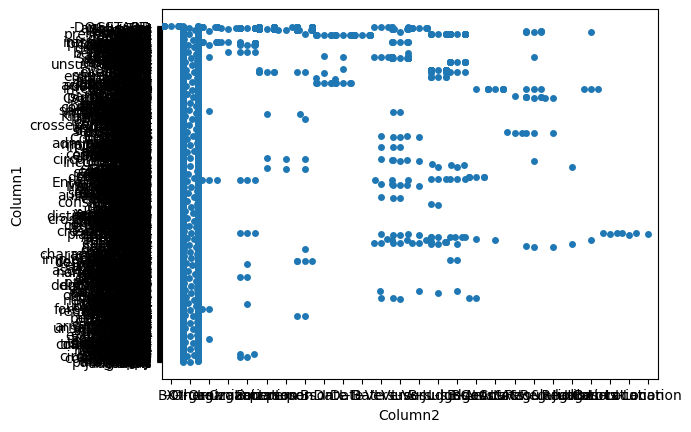

In [76]:
sns.swarmplot(x=df_data['Column2'],
              y=df_data['Column1'])

<Axes: xlabel='Column1', ylabel='Column2'>

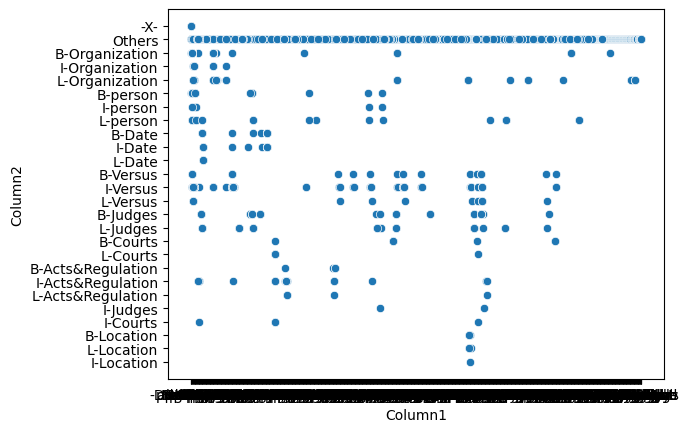

In [74]:
sns.scatterplot(x=df_data['Column1'], y=df_data['Column2'])

In [78]:
df_data['Column2']

0                  -X-
1               Others
2               Others
3               Others
4       B-Organization
             ...      
4385            Others
4386            Others
4387            Others
4388            Others
4389            Others
Name: Column2, Length: 4390, dtype: object

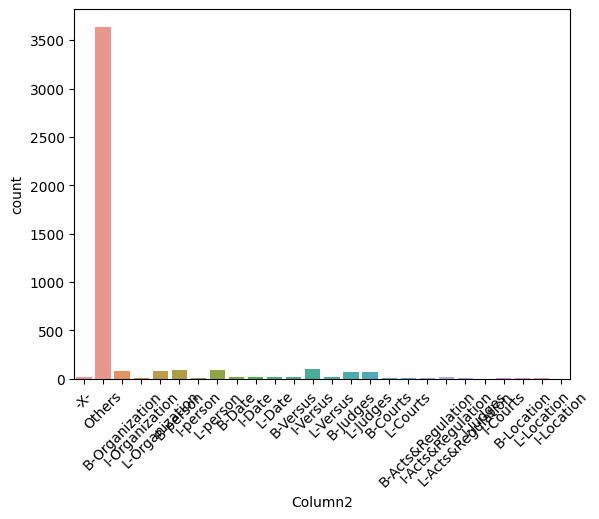

In [79]:
sns.countplot(data=df_data, x='Column2')
plt.xticks(rotation=45)
plt.show()

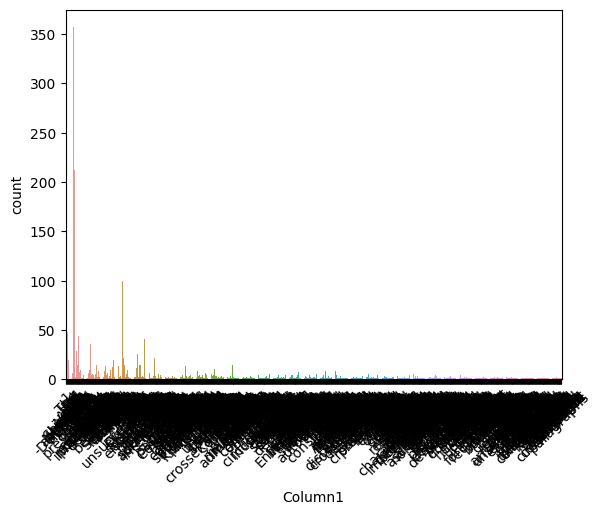

In [80]:
sns.countplot(data=df_data, x='Column1')
plt.xticks(rotation=45)
plt.show()

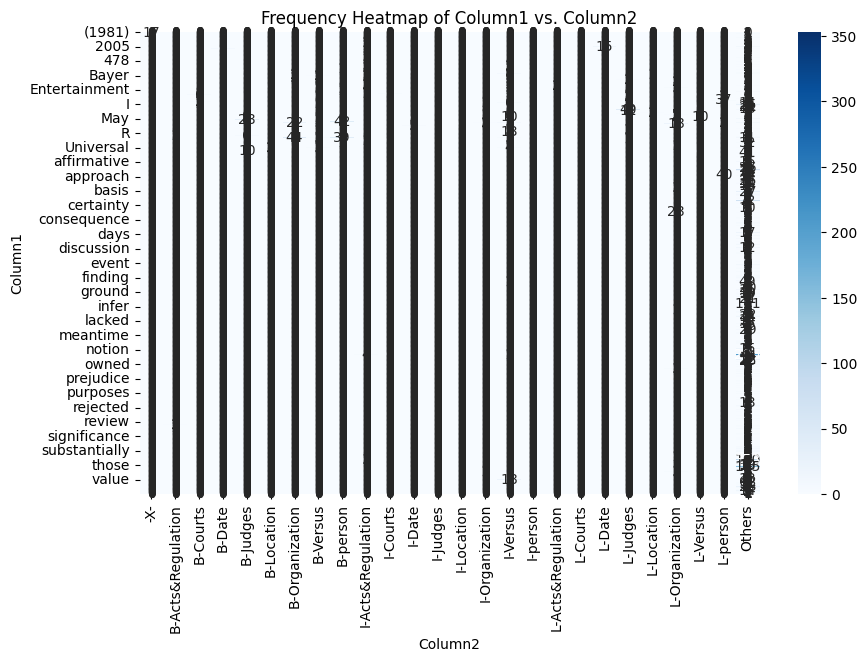

In [81]:

pivot_table = df_data.groupby(['Column1', 'Column2']).size().unstack(fill_value=0)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt='d')

# Set axis labels and title
plt.xlabel('Column2')
plt.ylabel('Column1')
plt.title('Frequency Heatmap of Column1 vs. Column2')

# Show the plot
plt.show()